
# **Netflix Dataset Analysis**

#**1. Introduction to Dataset**

The dataset under consideration is a Netflix dataset containing 7,789 records and 11
columns. It includes important details about Movies and TV Shows available on the
platform. Key attributes include the title, director, cast, country of origin, release date,
rating, duration, and type (genres). The dataset spans multiple years, with entries
ranging from 2008 to 2021, covering content across diverse countries and genres.

#**2. Problem Statement**
Netflix has become one of the most prominent global streaming platforms, continuously
expanding its library with a mix of original productions and licensed content. However,
with growing competition from platforms like Amazon Prime, Disney+, and regional OTT
providers, Netflix must strategically analyze its content catalog to identify strengths,
gaps, and opportunities.
The specific problem to be addressed in this project is 'Content Trends Analysis for
Strategic Recommendations'. The aim is to uncover how Netflix’s content distribution
(Movies vs. TV Shows, genres, and country contributions) has evolved over the years.
This will enable the identification of key genres, audience preferences, and strategic
insights into global content expansion

# 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#2. Setup visualization style

In [ ]:

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# 3. Load Dataset

✅ Shape of Dataset: (7789, 11)

📋 Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

🔍 Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


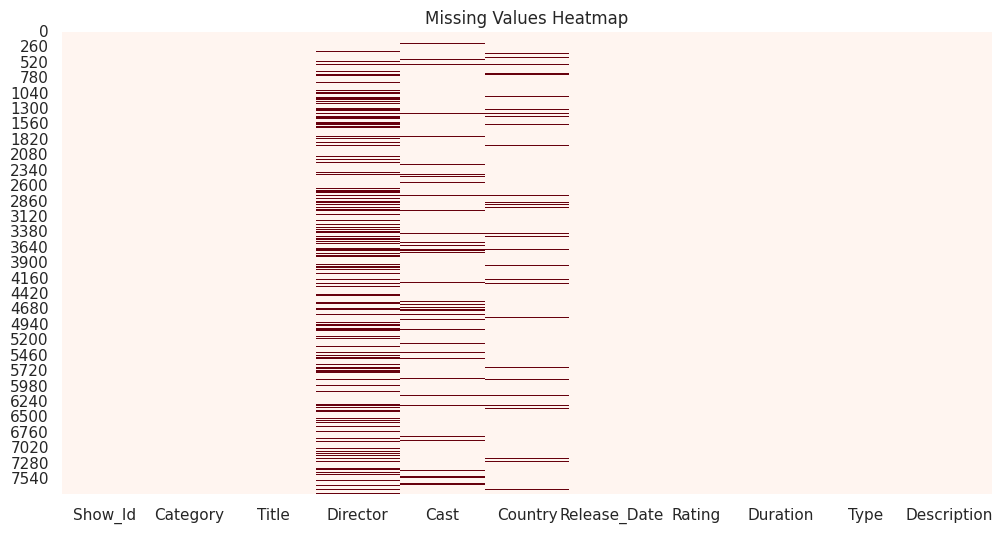

In [ ]:

df = pd.read_csv("Netflix Dataset.csv")

# Quick look at dataset
print("✅ Shape of Dataset:", df.shape)
print("\n📋 Columns:", df.columns.tolist())
print("\n🔍 Missing Values:\n", df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Values Heatmap")
plt.show()

# 4. Data Cleaning

In [ ]:
# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract Year
df['Year'] = df['Release_Date'].dt.year

# Handle missing values
for col in ['Director', 'Cast', 'Country', 'Rating']:
    df[col] = df[col].fillna("Unknown")

# Extract Main Genre (first genre listed in 'Type' column safely)
df['Main_Genre'] = df['Type'].apply(
    lambda x: x.split(",")[0].strip() if isinstance(x, str) else "Unknown"
)


# 5. Exploratory Data Analysis (EDA)

In [ ]:

print("\n🎬 Category Distribution:\n", df['Category'].value_counts())
print("\n🌍 Top 5 Countries:\n", df['Country'].value_counts().head(5))
print("\n📅 Dataset covers years from", df['Year'].min(), "to", df['Year'].max())




🎬 Category Distribution:
 Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

🌍 Top 5 Countries:
 Country
United States     2556
India              923
Unknown            507
United Kingdom     397
Japan              226
Name: count, dtype: int64

📅 Dataset covers years from 2008.0 to 2021.0


# 6. Analysis & Visualizations

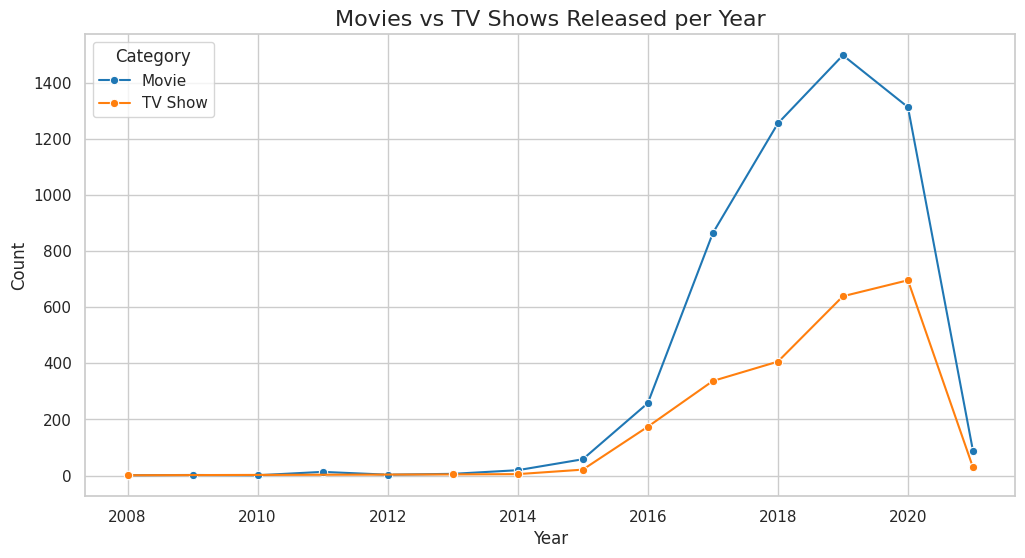

/tmp/ipython-input-4161624662.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="coolwarm")


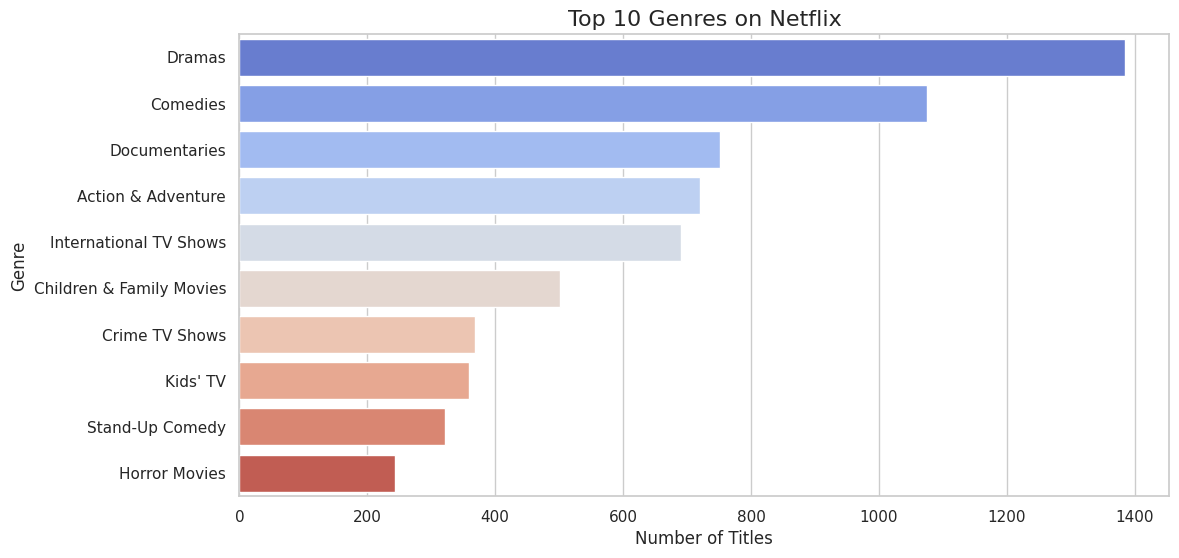

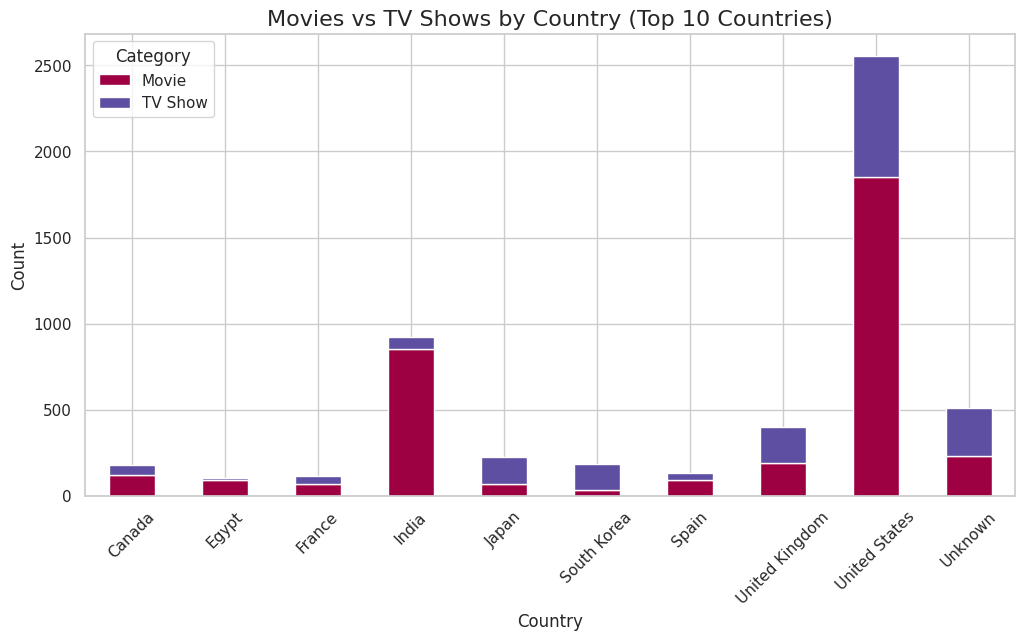

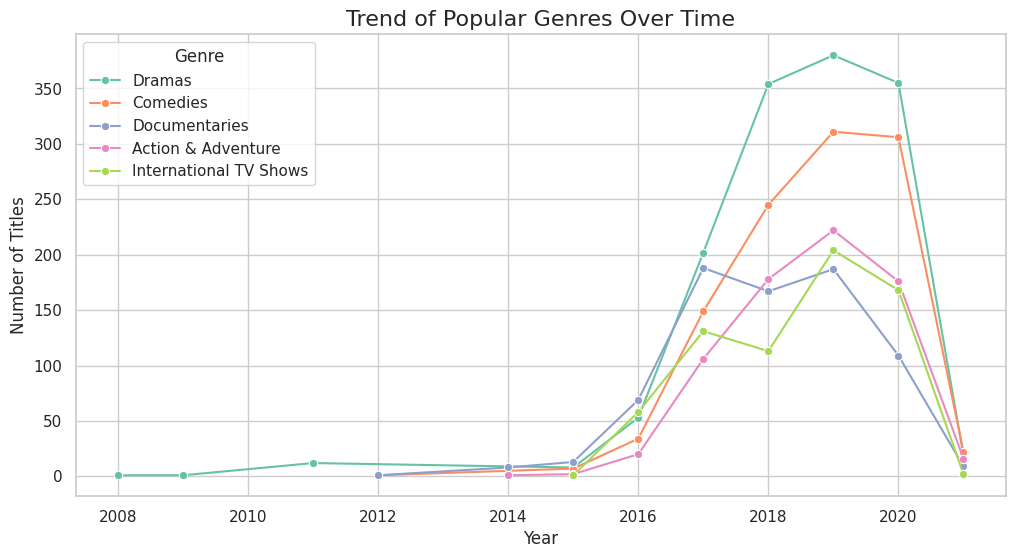

In [ ]:


# 1️⃣ Line Chart – Movies vs. TV Shows released per year
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o', palette="tab10")
plt.title("Movies vs TV Shows Released per Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# 2️⃣ Bar Chart – Top 10 Genres
top_genres = df['Main_Genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="coolwarm")
plt.title("Top 10 Genres on Netflix", fontsize=16)
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

# 3️⃣ Stacked Bar Chart – Movies vs TV Shows per Country (Top 10 countries)
top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]
stacked = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)

stacked.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="Spectral")
plt.title("Movies vs TV Shows by Country (Top 10 Countries)", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.show()

# 4️⃣ Choropleth Map – Country-wise Content
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
fig = px.choropleth(
    country_counts,
    locations="Country",
    locationmode="country names",
    color="Count",
    hover_name="Country",
    color_continuous_scale="Viridis",
    title="🌍 Netflix Content by Country"
)
fig.show()

# 5️⃣ Trend Line – Growth of Popular Genres Over Time
popular_genres = df['Main_Genre'].value_counts().head(5).index
genre_trends = (
    df[df['Main_Genre'].isin(popular_genres)]
    .groupby(['Year', 'Main_Genre'])
    .size()
    .reset_index(name='Count')
)

sns.lineplot(data=genre_trends, x='Year', y='Count', hue='Main_Genre', marker="o", palette="Set2")
plt.title("Trend of Popular Genres Over Time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.show()